# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [2]:
books_df = pd.read_excel('datasets/Amazon_top100_bestselling_books_2009to2021.xlsx')

In [3]:
books_df.head()

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction


# Data Analysis

In [4]:
books_df.shape

(1291, 10)

In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1291 non-null   int64  
 1   price          1287 non-null   float64
 2   ranks          1287 non-null   float64
 3   title          1286 non-null   object 
 4   no_of_reviews  1287 non-null   float64
 5   ratings        1287 non-null   float64
 6   author         1286 non-null   object 
 7   cover_type     1286 non-null   object 
 8   year           1291 non-null   int64  
 9   genre          1288 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 101.0+ KB


In [6]:
books_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1291.0,645.00,372.82,0.00,322.50,645.0,967.50,1290.0
price,1287.0,13.76,10.05,1.17,8.55,12.1,16.29,144.0
ranks,1287.0,50.25,28.80,1.00,25.00,50.0,75.00,100.0
no_of_reviews,1287.0,25827.71,32224.06,50.00,6769.00,16845.0,32326.00,344811.0
ratings,1287.0,4.65,0.20,3.40,4.60,4.7,4.80,4.9
year,1291.0,2015.03,3.73,2009.00,2012.00,2015.0,2018.00,2021.0


## Missed Value Problem

In [7]:
books_df.isnull().sum()

Unnamed: 0       0
price            4
ranks            4
title            5
no_of_reviews    4
ratings          4
author           5
cover_type       5
year             0
genre            3
dtype: int64

In [8]:
books_df.isnull().values.sum()

34

In [9]:
books_df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [10]:
numeric_cols = books_df.select_dtypes(np.number).columns

In [11]:
numeric_cols

Index(['Unnamed: 0', 'price', 'ranks', 'no_of_reviews', 'ratings', 'year'], dtype='object')

In [12]:
books_df = books_df.fillna(books_df.median())

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [13]:
books_df.dropna(axis=0, inplace=True)

In [14]:
books_df.drop('Unnamed: 0', axis=1, inplace=True)

## Convert Data Type

In [15]:
books_df['no_of_reviews'] = books_df['no_of_reviews'].astype(np.float64)

In [16]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1290
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1285 non-null   float64
 1   ranks          1285 non-null   float64
 2   title          1285 non-null   object 
 3   no_of_reviews  1285 non-null   float64
 4   ratings        1285 non-null   float64
 5   author         1285 non-null   object 
 6   cover_type     1285 non-null   object 
 7   year           1285 non-null   int64  
 8   genre          1285 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 100.4+ KB


In [17]:
books_df['no_of_reviews']

0       16118.0
1       23392.0
2        5036.0
3       16912.0
4        1572.0
         ...   
1286    21401.0
1287    79872.0
1288    15753.0
1289     7246.0
1290    27332.0
Name: no_of_reviews, Length: 1285, dtype: float64

In [18]:
def density_plot(dataframe, col):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(dataframe[col], color='green', fill=True)

<AxesSubplot:xlabel='no_of_reviews', ylabel='Density'>

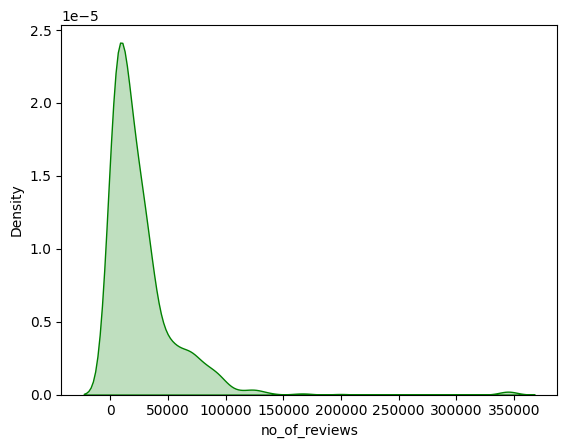

In [19]:
sns.kdeplot(books_df['no_of_reviews'], color='green', fill=True)

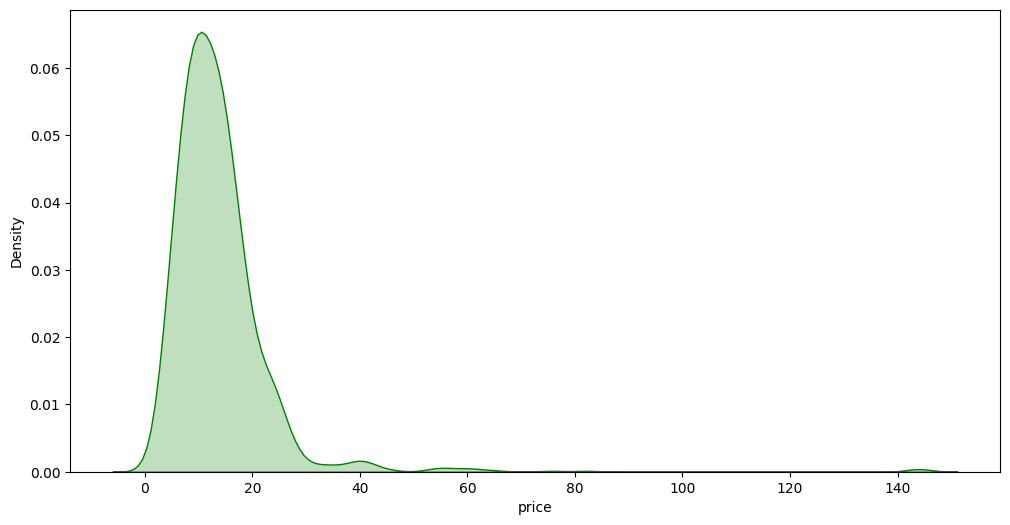

In [20]:
density_plot(books_df, 'price')

<AxesSubplot:xlabel='price', ylabel='ranks'>

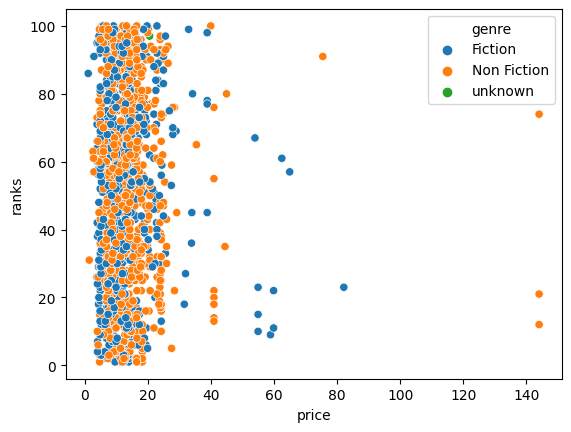

In [28]:
sns.scatterplot(x=books_df.price, y=books_df.ranks, hue=books_df.genre)

<AxesSubplot:xlabel='price', ylabel='ratings'>

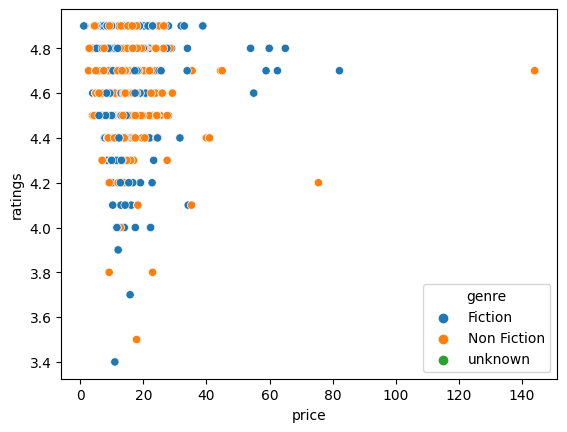

In [29]:
sns.scatterplot(x=books_df.price, y=books_df.ratings, hue=books_df.genre)

In [31]:
books_df.duplicated(keep='first').sum()

0

In [33]:
books_df.groupby('year')['price', 'ranks', 'ratings'].sum()

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,ranks,ratings
year,,,
2009,1619.75,4851.0,444.0
2010,1541.22,4801.0,443.7
2011,1642.22,5000.0,453.5
2012,1652.50,4952.0,453.3
2013,1673.76,5050.0,459.2
2014,1534.82,5000.0,460.7
2015,1271.10,5050.0,465.7
2016,1133.84,4910.0,460.0
2017,1147.61,4973.0,464.1


In [35]:
book_year_mean = books_df.groupby('year')['price', 'ranks', 'ratings'].mean()

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [36]:
book_year_mean

,price,ranks,ratings
year,,,
2009,16.698454,50.010309,4.577320
2010,15.888866,49.494845,4.574227
2011,16.588081,50.505051,4.580808
2012,16.691919,50.020202,4.578788
2013,16.737600,50.500000,4.592000
2014,15.503232,50.505051,4.653535
2015,12.711000,50.500000,4.657000
2016,11.569796,50.102041,4.693878
2017,11.592020,50.232323,4.687879


In [46]:
price_year_mean = books_df.groupby('year')[['price']].mean()

In [47]:
price_year_mean

,price
year,
2009,16.698454
2010,15.888866
2011,16.588081
2012,16.691919
2013,16.737600
2014,15.503232
2015,12.711000
2016,11.569796
2017,11.592020


<AxesSubplot:xlabel='year'>

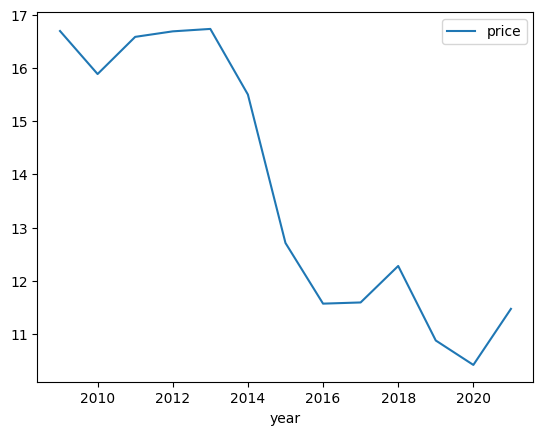

In [48]:
price_year_mean.plot()

(array([2., 3., 1., 1., 0., 0., 0., 0., 2., 4.]),
 array([10.417  , 11.04906, 11.68112, 12.31318, 12.94524, 13.5773 ,
        14.20936, 14.84142, 15.47348, 16.10554, 16.7376 ]),
 <BarContainer object of 10 artists>)

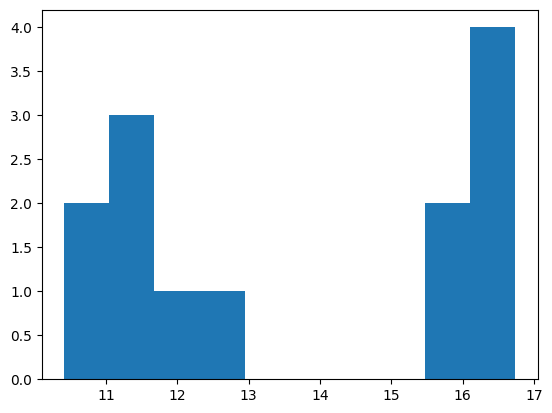

In [49]:
plt.hist(price_year_mean)

Text(0, 0.5, 'Price')

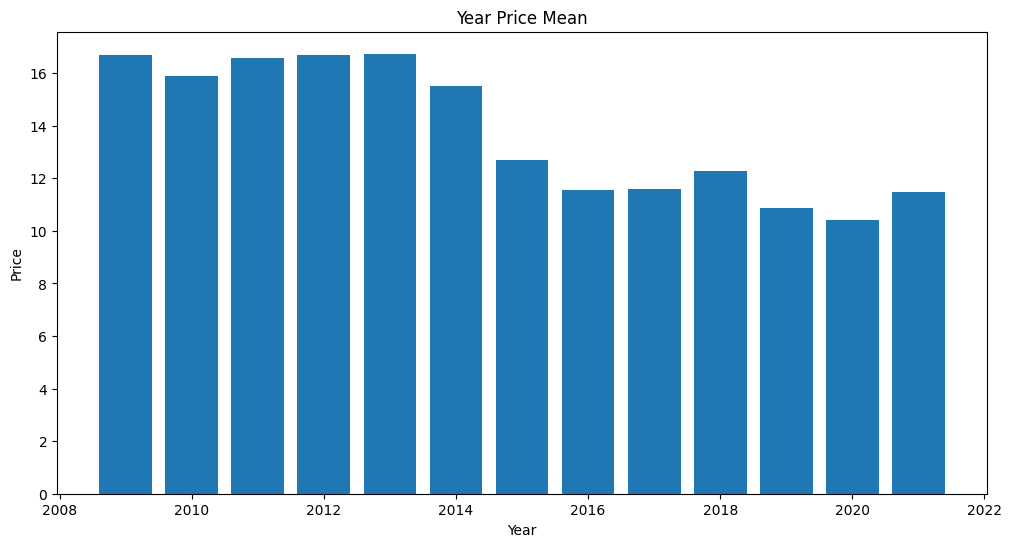

In [59]:
plt.figure(figsize=(12, 6))
plt.title('Year Price Mean')
plt.bar(price_year_mean.index, price_year_mean.price)
plt.xlabel('Year')
plt.ylabel('Price')

<AxesSubplot:xlabel='year', ylabel='price'>

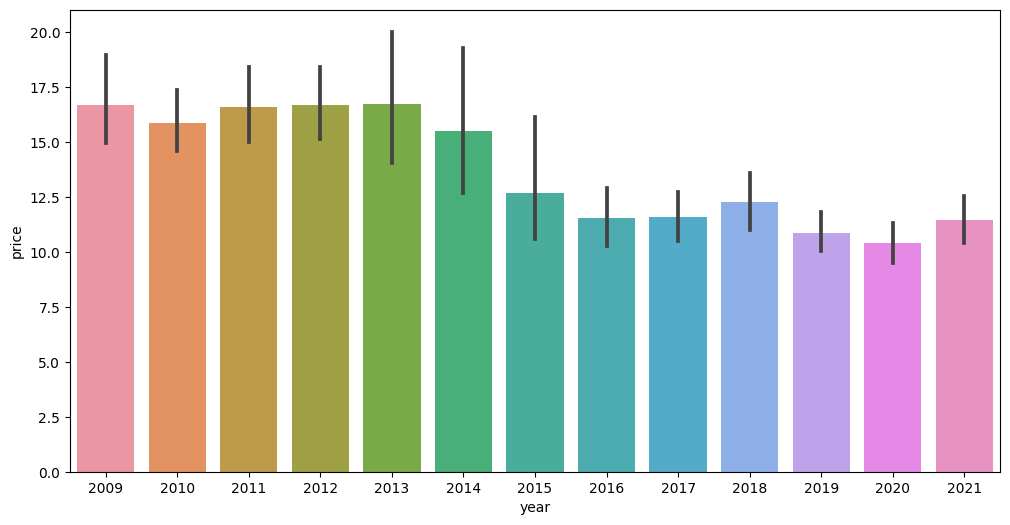

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='price', data=books_df)

<AxesSubplot:xlabel='year', ylabel='ranks'>

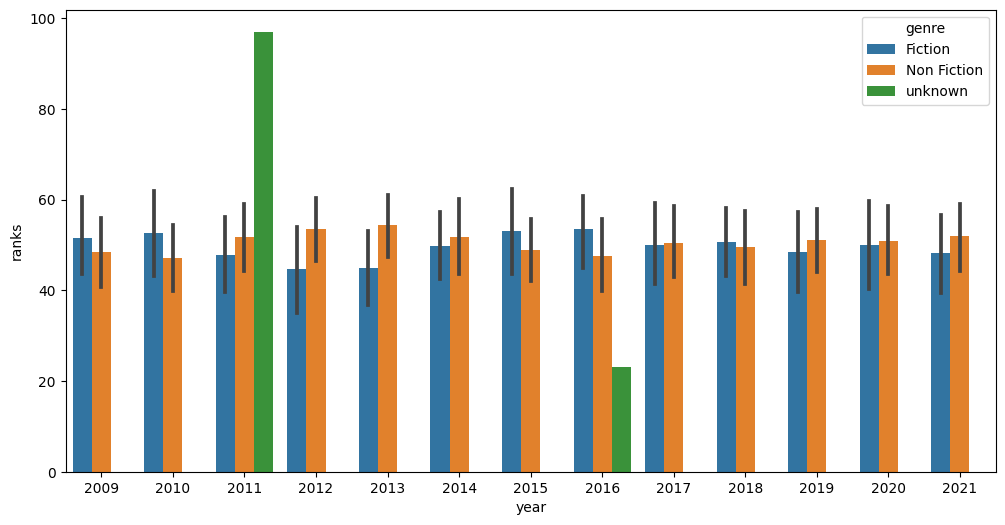

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='ranks', data=books_df, hue='genre')

<AxesSubplot:xlabel='year', ylabel='ratings'>

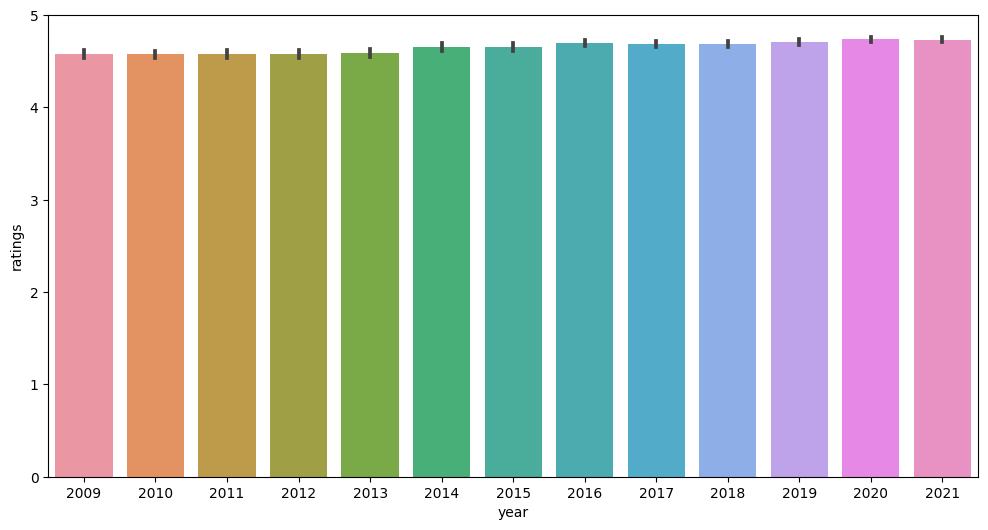

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='ratings', data=books_df)

<AxesSubplot:xlabel='year', ylabel='ratings'>

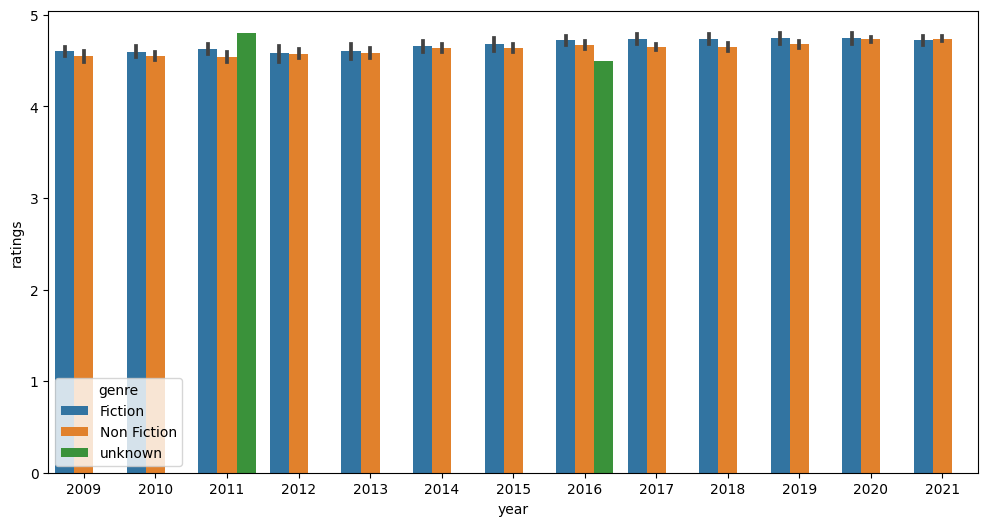

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='ratings', data=books_df, hue='genre')

<AxesSubplot:xlabel='year', ylabel='ratings'>

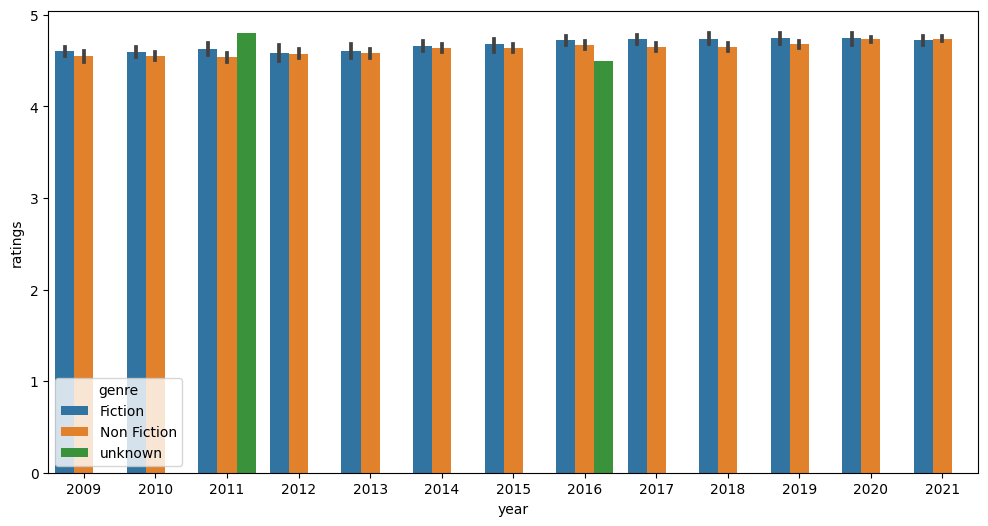

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='ratings', data=books_df, hue='genre')

## Correlation

In [68]:
correlation = books_df.corr(method='pearson')

Text(0.5, 1.0, 'Pearson Correlation Matrix')

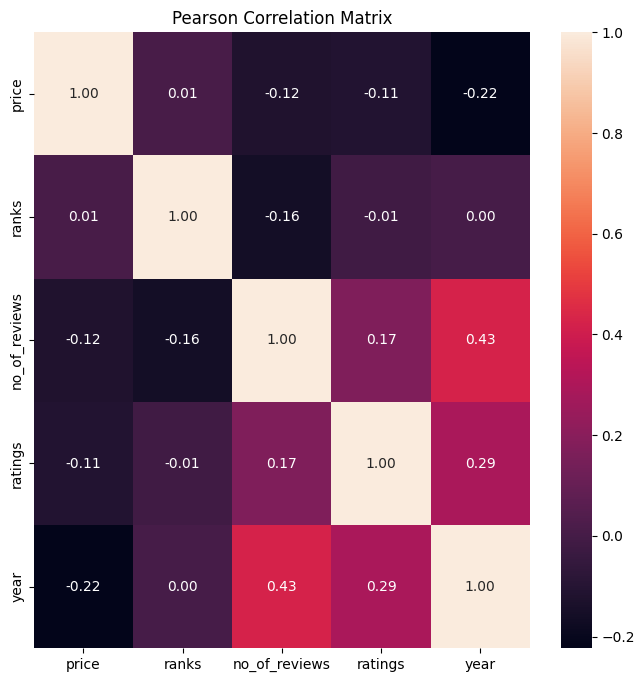

In [71]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')

<AxesSubplot:xlabel='price', ylabel='no_of_reviews'>

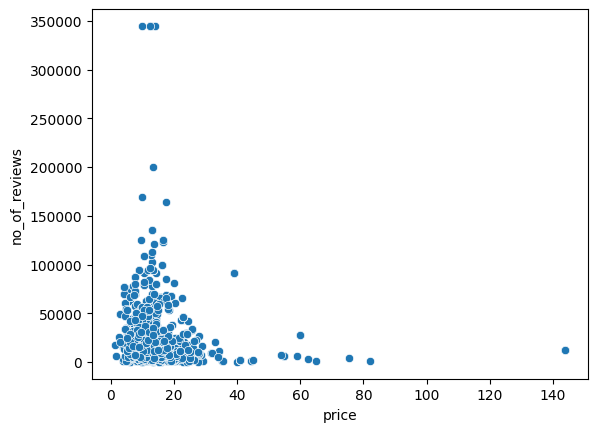

In [76]:
sns.scatterplot(x=books_df.price, y=books_df.no_of_reviews)

<AxesSubplot:xlabel='price', ylabel='no_of_reviews'>

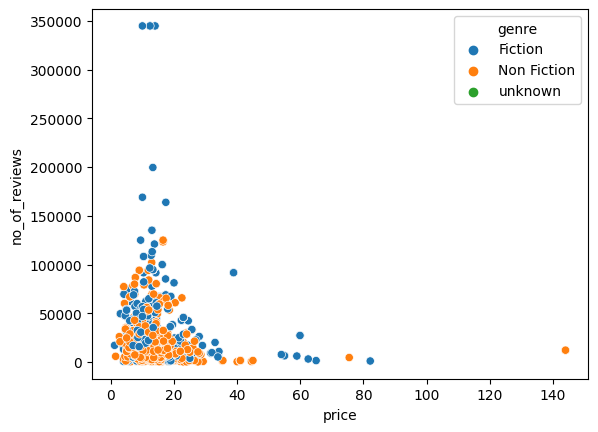

In [77]:
sns.scatterplot(x=books_df.price, y=books_df.no_of_reviews, hue=books_df.genre)